**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
%config IPCompleter.greedy=False

# To read data from diamonds.csv
import pandas as pd
import random
import time
from sklearn.preprocessing import OrdinalEncoder
from tabulate import tabulate
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import math
from pprint import pprint
import statistics
from matplotlib import pyplot as plt
from scipy import stats

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('Regression_Diamonds_data/diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


### About the dataset:

1. We have both categorical and numerical data 
2. For columns cut,color and clarity we have categorical data



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

# Data Preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carat    53940 non-null  object
 1   cut      53940 non-null  object
 2   color    53940 non-null  object
 3   clarity  53940 non-null  object
 4   depth    53940 non-null  object
 5   table    53940 non-null  object
 6   price    53940 non-null  object
 7   x        53940 non-null  object
 8   y        53940 non-null  object
 9   z        53940 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


### Observations:

1. As the non null values in all columns are same. We can say there are no null values in the given data set
2. Price is the target value, that has to be predicted

### Check for categorical data and convert to numerical values

In [3]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [5]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Data Preparation

Now as the categorical data is converted into numerical, we can continue training the data

In [6]:


# enc = OrdinalEncoder()
cut_mapper = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_mapper = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
clarity_mapper = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
# enc.fit(X)
data['cut'] = data['cut'].replace(cut_mapper)
data['color'] = data['color'].replace(color_mapper)
data['clarity'] = data['clarity'].replace(clarity_mapper)



keys = ["carat","depth","price","table","x","y","z"]
index_non_categorical = [0,4,5,6,6,7,8]
for x in keys:
    data[x] = [float(item) for item in data[x]]

# Training the Model

## 1.a) KNN Regression

### Step1: Split the data into training and testing

In [7]:
X = data.drop('price',axis=1)
y = data['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# splitting the train data into validation and train data
X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train, test_size = 0.25, random_state=5)

In [10]:
X_validation = X_validation.to_numpy()
X_train = X_train.to_numpy()
y_validation = y_validation.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### Step2: Train the algorithm with train_data

In [11]:
def eucledian(train,test):
    return np.sqrt(np.sum((train-test)**2,1))
    
def manhatton(train,test):
    return np.sum(np.abs(np.subtract(train,test)),1)

def hamming(train,test):
    return np.count_nonzero((train-test),1)
    
def predict(train,test,k,distance,y):
    predicted_values = []
    for x in range(0,len(test)):
        results = eval(distance + "(train,test[x])")
        indices = np.argpartition(results, k) 
        indices = indices[:k]
        predicted_values.append(np.sum(y[indices])/k)
    return predicted_values

def mean_square_error(predicted,actual):
    return (np.square(np.subtract(predicted,actual))).mean(axis=None)

def mean_absolute_error(predicted,actual):
    return (np.absolute(predicted-actual)).mean(axis=None)

def r_squared(predicted,actual):
    return ((np.corrcoef(predicted, actual))[0,1])**2


def display_error(predicted,actual):
    print("MSE: ",mean_square_error(predicted,actual))
    print("MAE: ",mean_absolute_error(predicted,actual))
    print("r_score:",r_squared(predicted,actual))

1. b) Do we need to normalise data? [If so Does it make any difference?].

Yes, we have to normalize the data, to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

In [12]:
import scipy.stats as stats
def z_score(data):
    return (data-np.mean(data))/np.std(data)

def min_max(data):
    diff = np.max(data) - np.min(data)
    return (data-np.min(data))/diff

def normalize(data,indexes,norm_factor):
    for x in indexes:
        data[:,x] = eval(norm_factor+"(data[:,x])")
    return data


X_train = normalize(X_train,index_non_categorical,"min_max")
X_validation = normalize(X_validation,index_non_categorical,"min_max")
X_test = normalize(X_test,index_non_categorical,"min_max")
errors = {}
for k in range(2,20):
    errors[k] = (r_squared(predict(X_train,X_validation,k,"eucledian",y_train),y_validation))

In [13]:
for k in errors.keys():
    print(str(k)+": "+str(errors[k]))

2: 0.8789680672439414
3: 0.8940635587516028
4: 0.8983844262378152
5: 0.9015631496585025
6: 0.9022275147891321
7: 0.9021876712192236
8: 0.9018720163486883
9: 0.9006703429839179
10: 0.898639274747009
11: 0.8963942070894232
12: 0.8938113053945826
13: 0.8921756731123387
14: 0.8898356207264839
15: 0.8881512189789706
16: 0.886502311345205
17: 0.8847470394583735
18: 0.8831141587225247
19: 0.8815100742071276


2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [14]:
# show all the experiments

def display_errors(mean_square_error1,mean_absolute_error1,r_squared1):
    print("MSE: ",mean_square_error1)
    print("MAE: ",mean_absolute_error1)
    print("r2_score ",r_squared1)

print("For eucledian distances")
temp = predict(X_train,X_test,5,"eucledian",y_train)
mean_square_error1 = mean_square_error(temp,y_test)
mean_absolute_error1 = mean_absolute_error(temp,y_test)
r_squared1 = r_squared(temp,y_test)
display_errors(mean_square_error1,mean_absolute_error1,r_squared1)
print("\n\n\n#########################################################\n\n\n")



print("For manhatton distances")
y_predict_knn = predict(X_train,X_test,5,"manhatton",y_train)
mean_square_error2 = mean_square_error(y_predict_knn,y_test)
mean_absolute_error2 = mean_absolute_error(y_predict_knn,y_test)
r_squared2 = r_squared(y_predict_knn,y_test)
display_errors(mean_square_error2,mean_absolute_error2,r_squared2)


print("\n\n\n#########################################################\n\n\n")
print("For hamming distances")
temp = predict(X_train,X_validation,5,"hamming",y_train)
mean_square_error3 = mean_square_error(temp,y_test)
mean_absolute_error3 = mean_absolute_error(temp,y_test)
r_squared3 = r_squared(temp,y_test)
display_errors(mean_square_error3,mean_absolute_error3,r_squared3)

For eucledian distances
MSE:  5961936.879162033
MAE:  2007.3284019280684
r2_score  0.8525643229512686



#########################################################



For manhatton distances
MSE:  839877.7568520579
MAE:  456.91221727845755
r2_score  0.9477589004670587



#########################################################



For hamming distances
MSE:  19710108.43803856
MAE:  3282.639803485354
r2_score  0.0002714498791301937


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [15]:
# report a table
tabuler_data = [["mean_square_error",mean_square_error1,mean_square_error2,mean_square_error3],["mean_absolute_error",mean_absolute_error1,mean_absolute_error2,mean_absolute_error3],["r_squared",r_squared1,r_squared2,r_squared3]]
print(tabulate(tabuler_data, headers=['Errors','Eucledian','Manhattan','Hamming'], tablefmt='orgtbl'))

| Errors              |      Eucledian |     Manhattan |        Hamming |
|---------------------+----------------+---------------+----------------|
| mean_square_error   |    5.96194e+06 | 839878        |    1.97101e+07 |
| mean_absolute_error | 2007.33        |    456.912    | 3282.64        |
| r_squared           |    0.852564    |      0.947759 |    0.00027145  |


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [16]:
# plot
ks = [2,3,5,7,11,16]
r2_scores = []
for k in ks:
    r2_scores.append(r_squared(predict(X_train,X_test,k,"eucledian",y_train),y_test))

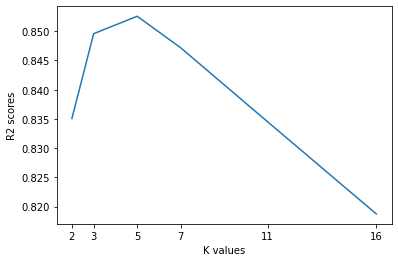

In [17]:
fig,ax = plt.subplots(1,1)
ax.plot(ks, r2_scores) 
  
ax.set_xlabel('K values') 
ax.set_ylabel('R2 scores') 
ax.set_xticks(ks)
plt.show() 

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

### Explanation

R2 scores are not same for each value of K. In KNN regression, K is a hyperparameter, whenever we tune it the results vary. We will choose the best k value depending the evaluation_metrics. 

Here for the K value as 5 r2_score is high. high r2_score indicates better model. So we can didentify the best K using evaluation_metrices. we can also identify the K with the error it produces. lesser teh error more better the model is fitted to the data. 

Computation procedure here may mean that we can calculate for which value of K we get more acuracy we choose that using evaluation metrices

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [18]:
# scikit-learn KNN Regressor

from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor(n_neighbors=8)

model.fit(X_train,y_train)  
pred = model.predict(X_test)
display_error(pred,y_test)
r2_scores = r_squared(pred,y_test)

MSE:  5678004.78345152
MAE:  1963.6934556915091
r_score: 0.8435327082973947


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [19]:
# Comparison
tabuler_data = [["Using inbuilt algorithm",r2_scores],["My algorithm",r_squared2]]
print(tabulate(tabuler_data, headers=['','R2 Scores'], tablefmt='orgtbl'))

|                         |   R2 Scores |
|-------------------------+-------------|
| Using inbuilt algorithm |    0.843533 |
| My algorithm            |    0.947759 |


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


# Report this  along with the experiments

<b>Advantages:</b>

- No Training Period</b>- KNN modeling does not include training period as the data itself is a model which will be the reference for future prediction and because of this it is very time efficient in term of improvising for a random modeling on the available data.
- Easy Implementation</b>- KNN is very easy to implement as the only thing to be calculated is the distance between different points on the basis of data of different features and this distance can easily be calculated using distance formula such as- Euclidian or Manhattan
- As there is no training period thus new data can be added at any time since it wont affect the model.

<b>Disadvantages</b>
    
- Does not work well with large dataset</b> as calculating distances between each data instance would be very costly.
- Does not work well with high dimensionality</b> as this will complicate the distance calculating process to calculate distance for each dimension.
- Sensitive to noisy and missing data</b>
- Feature Scaling</b>- Data in all the dimension should be scaled (normalized and standardized) properly .